₹

## Calculate the mean, median, mode and standard deviation for the problem statements 1& 2.

## Problem Statement 1:
The marks awarded for an assignment set for a Year 8 class of 20 students were as follows:  
6 7 5 7 7 8 7 6 9 7 4 10 6 8 8 9 5 6 4 8

## Problem Statement 2:
The number of calls from motorists per day for roadside service was recorded for a particular month:  
28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170, 100, 75, 104, 97, 75, 123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
from scipy import stats

marks = np.array(list(map(int, '6 7 5 7 7 8 7 6 9 7 4 10 6 8 8 9 5 6 4 8'.split())))

print('Problem #1')
print('--'*25)
print(f'Mean: {np.mean(marks)}')
print(f'Median: {np.median(marks)}')
print(f'Mode: {stats.mode(marks)[0]}')
print(f'Standard Deviation: {np.std(marks)}')
print('#'*70,'\n')

calls = np.array([
    28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174,
    194, 170, 100, 75, 104, 97, 75, 123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109
                 ])

print('Problem #2')
print('--'*25)
print(f'Mean: {np.mean(calls)}')
print(f'Median: {np.median(calls)}')
print(f'Mode: {stats.mode(calls)[0]}')
print(f'Standard Deviation: {np.std(calls)}')
print('#'*70)

Problem #1
--------------------------------------------------
Mean: 6.85
Median: 7.0
Mode: [7]
Standard Deviation: 1.5898113095584647
###################################################################### 

Problem #2
--------------------------------------------------
Mean: 107.51428571428572
Median: 100.0
Mode: [75]
Standard Deviation: 38.77287080168403
######################################################################


## Problem Statement 3:
The number of times I go to the gym in weekdays, are given below along with its associated probability:  
$x$ = 0, 1, 2, 3, 4, 5  
$f(x)$ = 0.09, 0.15, 0.40, 0.25, 0.10, 0.01   
Calculate the mean no. of workouts in a week. Also evaluate the variance involved in it.

In [3]:
# Random Variable X
x = np.array([0, 1, 2, 3]) 
# Probability of Random variable X
y = np.array([.125, .375, .375, .125])

mean = sum(x * y)
var = sum(x**2 * y) - mean**2

print(f'Mean number of workouts: {mean}')
print(f'Variance involved: {var}')

Mean number of workouts: 1.5
Variance involved: 0.75


## Problem Statement 4:
Let the continuous random variable D denote the diameter of the hole drilled in an aluminum sheet. The target diameter to be achieved is 12.5mm. Random disturbances in the process often result in inaccuracy.  
Historical data shows that the distribution of D can be modelled by the $PDF (d) = 20e^{−20(d−12.5)}, d ≥ 12.5$. If a part with diameter > 12.6 mm needs to be scrapped, what is the proportion of those parts?  
What is the CDF when the diameter is of 11 mm? What is your conclusion regarding the proportion of scraps?

Let suppose CDF of a Continuous Random Variable $X$ be $F(X)$.  
Then its PDF of is given by $\frac{\mathrm{d}F(X)}{\mathrm{d}X}$

Similarly, let PDF be $f(x)$  
Then its CDF will be  $\int\limits_{-\infty}^{\infty} f(x) \mathrm{d}x$

Proportion to be scrapped when diameter > 12.6 mm is 0.865


Text(0.5, 1.0, 'Probability Distribution Function')

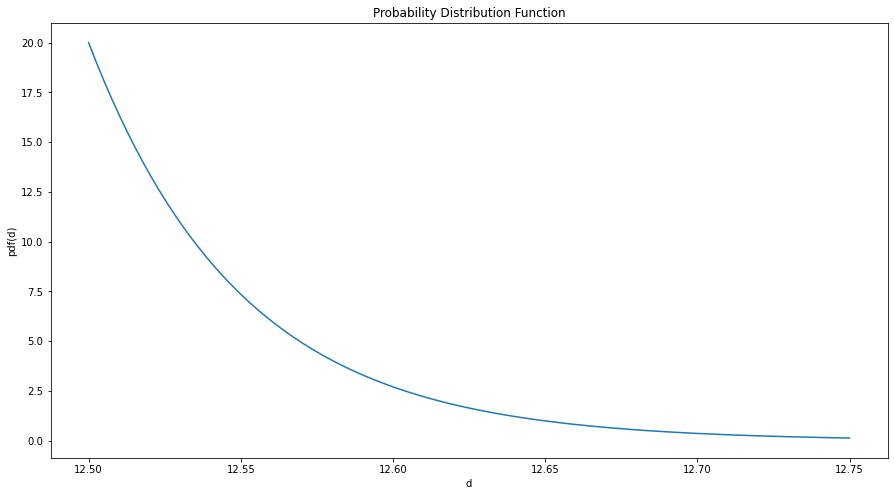

In [4]:
from scipy.integrate import quad

import matplotlib.pyplot as plt

# Proability Distribution Function, where d >= 12.5
def pdf(d):
    return 20 * np.exp(-20 * (d - 12.5))

# Proportion to be scrapped when d > 12.6
res, err = quad(pdf, 12.6, np.inf)
scrap = 1 - res
print(f'Proportion to be scrapped when diameter > 12.6 mm is {round(scrap, 3)}')

# Plotting
x = np.linspace(12.5, 12.75, 100)
y = pdf(x)
plt.figure(figsize=(15, 8))
plt.plot(x, y)
plt.xlabel('d')
plt.ylabel('pdf(d)')
plt.title('Probability Distribution Function')

From the above plot it is quite clear that the PDF behaves well if the diameter is beyond 12.5 mm.  
Any diameter fitted to the PDF below 12.5 rises abruptly to infinity thereby resulting in a NAN value.

In [5]:
# CDF when d = 11
res, err = quad(pdf, -np.inf, 11)
scrap = 1 - res
print(f'Proportion of scrap when diameter is 11mm: {scrap}')

Proportion of scrap when diameter is 11mm: nan


If we try to calculate the CDF when target diameter d >= 11mm, then we need to modify the PDF.  
$PDF (d) = 20e^{−20(d−11)}, d ≥ 11$

Proportion to be scrapped after modifying the PDF, for diameter > 12.6 mm is 1.0


Text(0.5, 1.0, 'Probability Distribution Function')

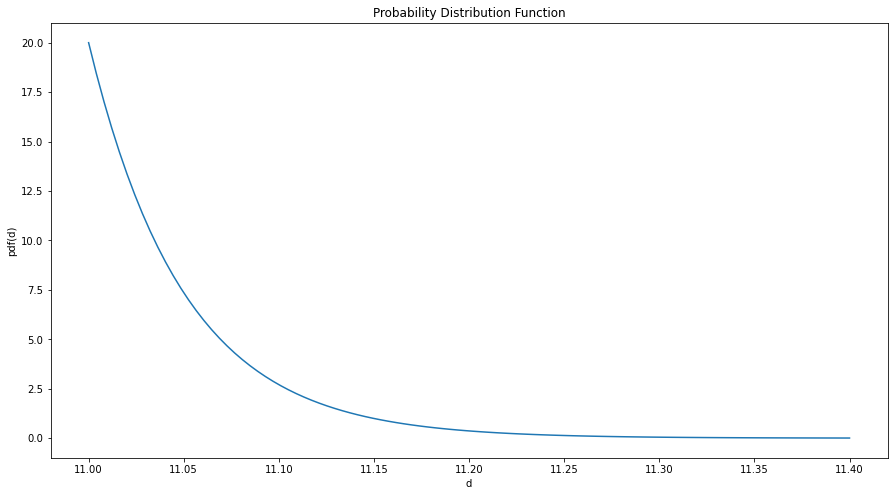

In [6]:
# Proability Distribution Function, where d >= 11
def pdf(d):
    return 20 * np.exp(-20 * (d - 11))

# Proportion to be scrapped when d > 12.6
res, err = quad(pdf, 12.6, np.inf)
scrap = 1 - res
print(f'Proportion to be scrapped after modifying the PDF, for diameter > 12.6 mm is {round(scrap, 3)}')

# Plotting
x = np.linspace(11, 11.4, 100)
y = pdf(x)
plt.figure(figsize=(15, 8))
plt.plot(x, y)
plt.xlabel('d')
plt.ylabel('pdf(d)')
plt.title('Probability Distribution Function')

## Problem Statement 5:
A company manufactures LED bulbs with a faulty rate of 30%. If I randomly select 6 chosen LEDs, what is the probability of having 2 faulty LEDs in my sample?  
Calculate the average value of this process. Also evaluate the standard deviation associated with it.

Probability of having 2 faulty LEDs in a randomly selected sample of 6 LEDs is 0.324
Average of this process is 1.8
Standard Deviation is 1.122


<AxesSubplot:ylabel='Density'>

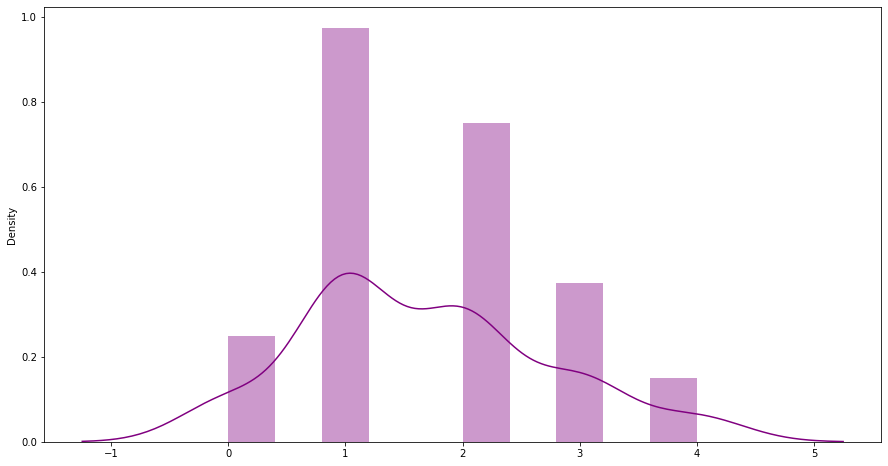

In [7]:
from scipy.stats import binom
import seaborn as sns

# faulty rate assumed to be probability of success
p = .3
# numbr of trials i.e random selection of LEDs
n = 6
# number of specific outcome
x = 2

# Probability of 2 being faulty in a random sample of 6
b_x2 = binom.pmf(x, n, p)

# Average and standard deviation of the process
mean, var = binom.stats(n, p)
std = np.sqrt(var)

print(f'Probability of having 2 faulty LEDs in a randomly selected sample of 6 LEDs is {round(b_x2, 3)}')
print(f'Average of this process is {np.round(mean, 3)}\nStandard Deviation is {round(std, 3)}')

# Plotting the distribution
plt.figure(figsize=(15, 8))
binomial_data = binom.rvs(n, p, size=100)
sns.distplot(binomial_data, hist=True, kde=True, color='purple')

## Problem Statement 6:
Gaurav and Barakha are both preparing for entrance exams. Gaurav attempts to solve 8 questions per day with a correction rate of 75%, while Barakha averages around 12 questions per day with a correction rate of 45%. What is the probability that each of them will solve 5 questions correctly? What happens in cases of 4 and 6 correct solutions? What do you infer from it? What are the two main governing factors affecting their ability to solve questions correctly? Give a pictorial representation of the same to validate your answer.

Probability of solving X questions correctly

X	Gaurav	Barakha
5	0.208	0.222
4	0.087	0.17
6	0.311	0.212

The main factors governing their ability to solve questions are
1. Correction Rate
2. Number of attempts


Text(0.5, 1.0, 'Barakha')

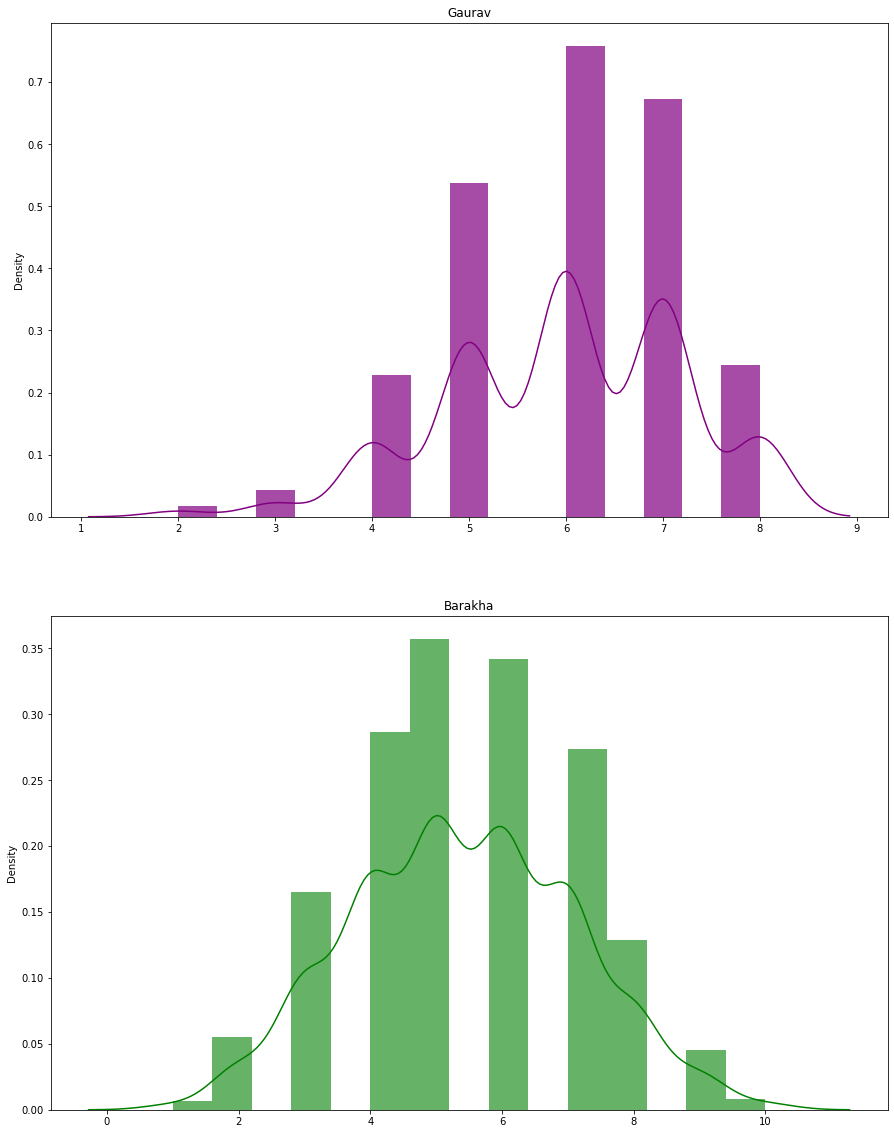

In [8]:
# 1 represents Gaurav 
# Correction Rate assumed to be Probability of Success
p1 = .75
# Number of attempts 
n1 = 8

# 2 represents Barakha
p2 = 0.45
n2 = 12

# number of specific outcomes
x = np.array([5, 4, 6])

b1 = binom.pmf(x, n1, p1)
b2 = binom.pmf(x, n2, p2)

print('Probability of solving X questions correctly\n')
print('X\tGaurav\tBarakha')
for i in range(len(x)):
    print(f'{x[i]}\t{np.round(b1[i], 3)}\t{np.round(b2[i], 3)}')
    
print('\nThe main factors governing their ability to solve questions are\n1. Correction Rate\n2. Number of attempts')

bd1 = binom.rvs(n1, p1, size=1000)
bd2 = binom.rvs(n2, p2, size=1000)

# Plot
plt.figure(figsize=(15, 20))
plt.subplot(2,1,1)
sns.distplot(bd1, hist=True, kde=True, color='purple', hist_kws={'alpha':.7}).set_title('Gaurav')
plt.subplot(2,1,2)
sns.distplot(bd2, hist=True, kde=True, color='green', hist_kws={'alpha':.6}).set_title('Barakha')


## Problem Statement 7:
Customers arrive at a rate of 72 per hour to my shop. What is the probability of k customers arriving in 4 minutes?  
a) 5 customers,  
b) not more than 3 customers,  
c) more than 3 customers.  
Give a pictorial representation of the same to validate your answer.

a. Probability of exactly 5 customers arriving in 4 minutes: 0.175

b. Probability of at most 3 customers arriving in 4 minutes: 0.143

c. Probability of at least 3 customers arriving in 4 minutes : 0.857


<AxesSubplot:ylabel='Density'>

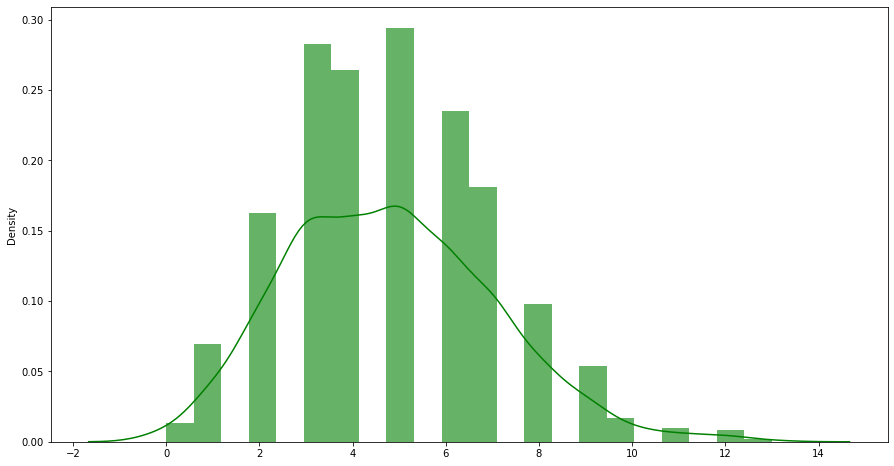

In [9]:
from scipy.stats import poisson

# Arrival rate per minute
min = 72/60
# Arrival in 4 minutes
mu = 4 * min

# Probability of exactly 5 customers arriving in 4 minutes
p_5 = poisson.pmf(5, mu)

# Probability of at most 3 customers arriving in 4 minutes
p_lt3 = sum(poisson.pmf(np.array(range(3)), mu))

# Probability of at least 3 customers arriving in 4 minutes
p_gt3 = 1 - p_lt3

print(f'a. Probability of exactly 5 customers arriving in 4 minutes: {np.round(p_5, 3)}\n')
print(f'b. Probability of at most 3 customers arriving in 4 minutes: {np.round(p_lt3, 3)}\n')
print(f'c. Probability of at least 3 customers arriving in 4 minutes : {np.round(p_gt3, 3)}')

# Plot
plt.figure(figsize=(15,8))
poisson_data = poisson.rvs(mu=4.8, size=1000)
sns.distplot(poisson_data, hist=True, kde=True, color="green", hist_kws={'alpha':.6})

## Problem Statement 8:
I work as a data analyst in Aeon Learning Pvt. Ltd. After analyzing data, I make reports, where I have the efficiency of entering 77 words per minute with 6 errors per hour. What is the probability that I will commit 2 errors in a 455-word financial report?  
What happens when the no. of words increases/decreases (in case of 1000 words, 255 words)?  
How is the $λ$ affected?  
How does it influence the PMF?  
Give a pictorial representation of the same to validate your answer.

Words	λ	PMF
--------------------
255	0.331	0.039
455	0.591	0.097
1000	1.299	0.23


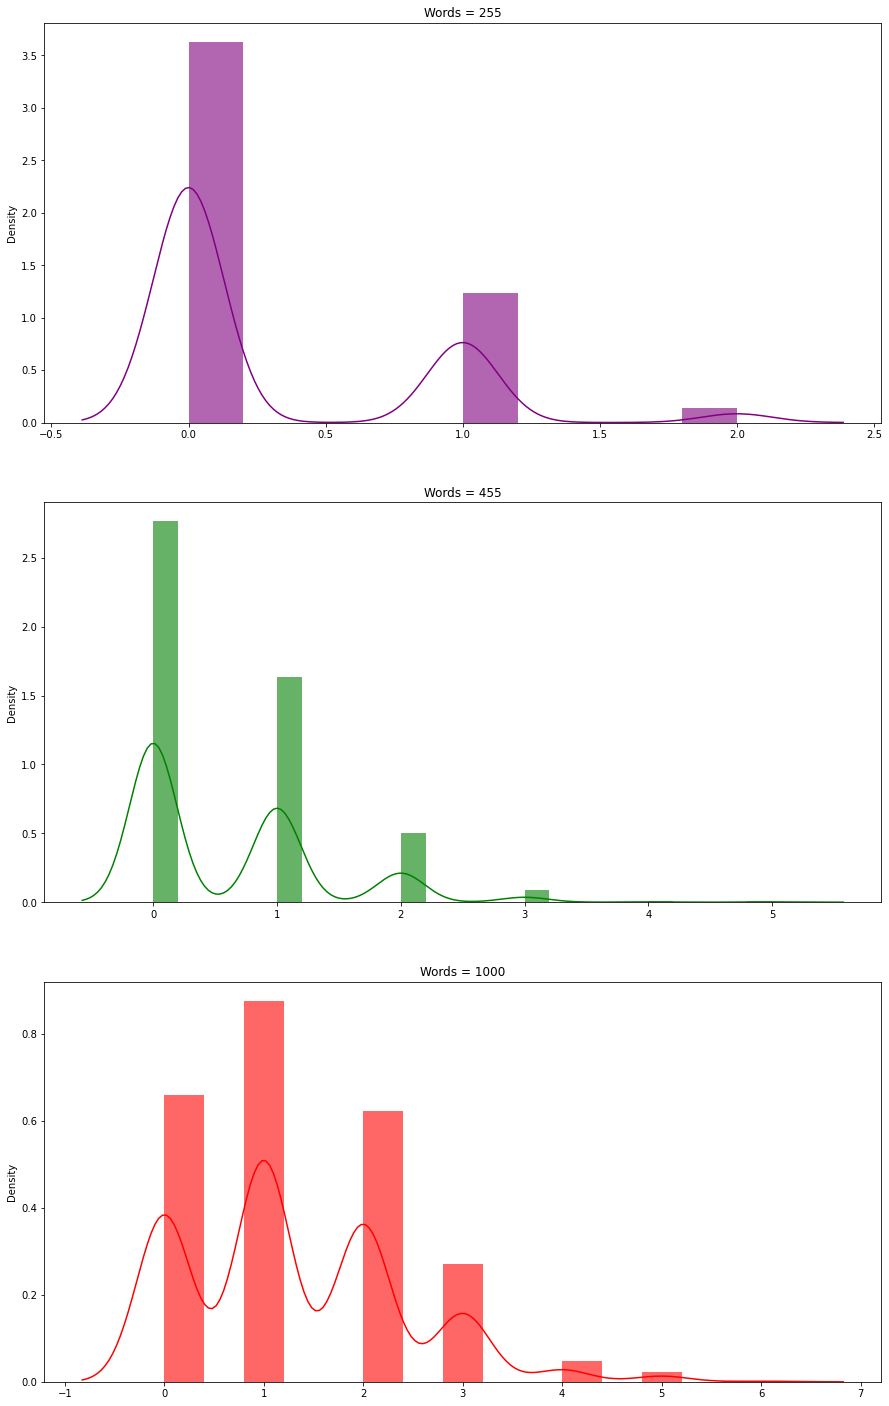

In [10]:
# Typing speed per hour
wph = 77 * 60
# Error per word
e = 6 / wph
# Report length
l = np.array([255, 455, 1000])
# Mean
mu = e * l
# Number error per report
x = 2
P = []
colors = ['purple', 'green', 'red']
print('Words\t\u03BB\tPMF')
print('-'*20)
plt.figure(figsize = (15, 25))
for i in range(len(l)):
    # According to Poisson's Distribution
    pmf = poisson.pmf(x, mu[i])
    P.append(pmf)
    print(f'{l[i]}\t{np.round(mu[i], 3)}\t{np.round(pmf, 3)}')
    
    #Plot
    plt.subplot(3, 1, i+1)
    poisson_data = poisson.rvs(mu=mu[i], size=1000)
    sns.distplot(poisson_data, hist=True, kde=True, color=colors[i], hist_kws={'alpha':.6}).set_title(f'Words = {l[i]}')

## Problem Statement 9:
Let the continuous random variable D denote the diameter of the hole drilled in an aluminum sheet. The target diameter to be achieved is 12.5mm. Random disturbances in the process often result in inaccuracy.  
Historical data shows that the distribution of D can be modelled by the $PDF (d) = 20e^{−20(d−12.5)}, d ≥ 12.5$. If a part with diameter > 12.6 mm needs to be scrapped, what is the proportion of those parts?  
What is the CDF when the diameter is of 11 mm?  
What is the conclusion of this experiment?

Let suppose CDF of a Continuous Random Variable $X$ be $F(X)$.  
Then its PDF of is given by $\frac{\mathrm{d}F(X)}{\mathrm{d}X}$

Similarly, let PDF be $f(x)$  
Then its CDF will be  $\int\limits_{-\infty}^{\infty} f(x) \mathrm{d}x$

Proportion to be scrapped when diameter > 12.6 mm is 0.865


Text(0.5, 1.0, 'Probability Distribution Function')

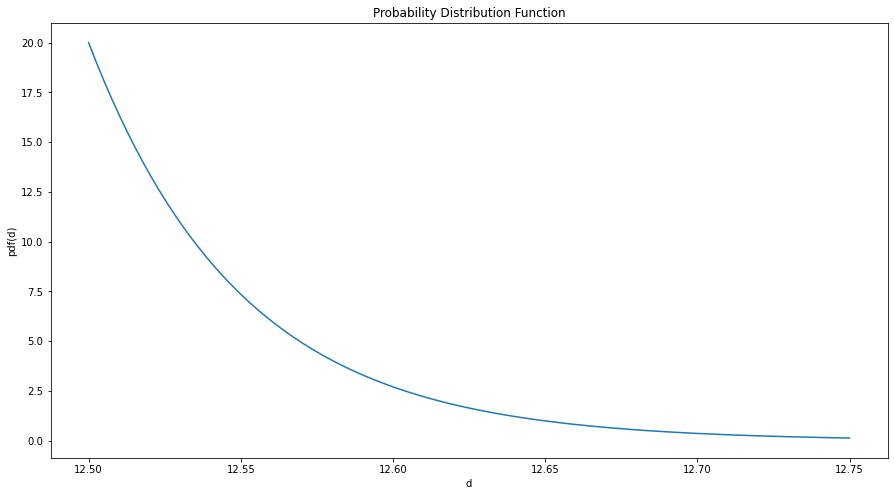

In [11]:
# Proability Distribution Function, where d >= 12.5
def pdf(d):
    return 20 * np.exp(-20 * (d - 12.5))

# Proportion to be scrapped when d > 12.6
res, err = quad(pdf, 12.6, np.inf)
scrap = 1 - res
print(f'Proportion to be scrapped when diameter > 12.6 mm is {round(scrap, 3)}')

# Plotting
x = np.linspace(12.5, 12.75, 100)
y = pdf(x)
plt.figure(figsize=(15, 8))
plt.plot(x, y)
plt.xlabel('d')
plt.ylabel('pdf(d)')
plt.title('Probability Distribution Function')

From the above plot it is quite clear that the PDF behaves well if the diameter is beyond 12.5 mm.  
Any diameter fitted to the PDF below 12.5 rises abruptly to infinity thereby resulting in a NAN value.

In [12]:
# CDF when d = 11
res, err = quad(pdf, -np.inf, 11)
scrap = 1 - res
print(f'Proportion of scrap when diameter is 11mm: {scrap}')

Proportion of scrap when diameter is 11mm: nan


If we try to calculate the CDF when target diameter d >= 11mm, then we need to modify the PDF.  
$PDF (d) = 20e^{−20(d−11)}, d ≥ 11$

Proportion to be scrapped after modifying the PDF, for diameter > 12.6 mm is 1.0


Text(0.5, 1.0, 'Probability Distribution Function')

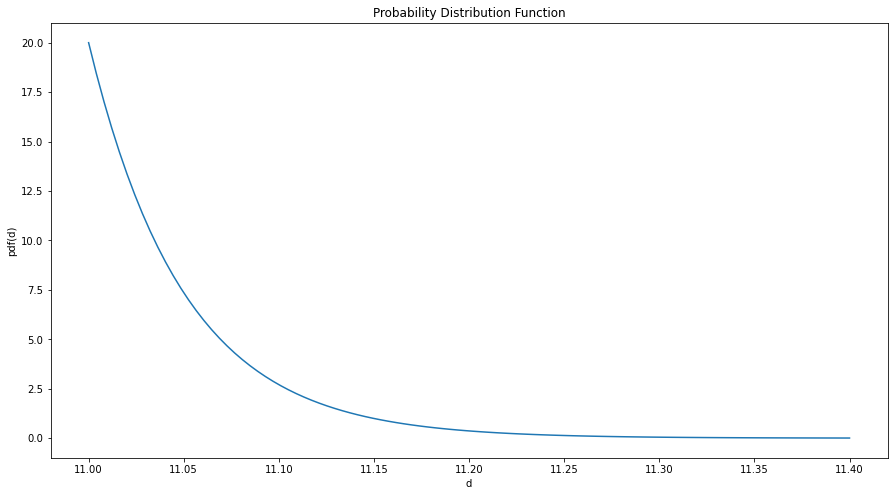

In [13]:
# Proability Distribution Function, where d >= 11
def pdf(d):
    return 20 * np.exp(-20 * (d - 11))

# Proportion to be scrapped when d > 12.6
res, err = quad(pdf, 12.6, np.inf)
scrap = 1 - res
print(f'Proportion to be scrapped after modifying the PDF, for diameter > 12.6 mm is {round(scrap, 3)}')

# Plotting
x = np.linspace(11, 11.4, 100)
y = pdf(x)
plt.figure(figsize=(15, 8))
plt.plot(x, y)
plt.xlabel('d')
plt.ylabel('pdf(d)')
plt.title('Probability Distribution Function')

## Problem Statement 10:
Please compute the following:  
a) $P(Z > 1.26), P(Z < −0.86), P(Z > −1.37), P(−1.25 < Z < 0.37), P(Z ≤ −4.6)$  
b) Find the value z such that $P(Z > z) = 0.05$  
c) Find the value of z such that $P(−z < Z < z) = 0.99$

In [46]:
# P(Z > x) => stats.norm.sf(x) & P(Z < x) => stats.norm.sf(-x)

# P(Z > 1.26)
a = stats.norm.sf(1.26)
# P(Z < -1.86)
b = stats.norm.sf(1.86)
# P(Z > -1.37)
c = stats.norm.sf(-1.37)
# P(-1.25 < Z < 0.37)
d = stats.norm.sf(-1.25) - stats.norm.sf(-0.37)
# P(Z <= -4.6)
e = stats.norm.sf(4.6)

print('a)')
print(f'P(Z > 1.26): {round(a, 5)}')
print(f'P(Z < -1.86): {round(b, 5)}')
print(f'P(Z > -1.37): {round(c, 5)}')
print(f'P(-1.25 < Z < 0.37): {round(d, 5)}')
print(f'P(Z <= -4.6): {round(e, 5)}')
print('-----'*10)

# P(Z > z) = 0.05
k = stats.norm.ppf(0.05)
# P(-z < Z < z) = 0.99
# to split both sides
l = (1 - .99) / 2
m = stats.norm.ppf(0+l)
n = stats.norm.ppf(1-l)

print('b)')
print(f'P(Z > z) = 0.05: z = {round(k, 2)}')
print('-----'*10)
print('c)')
print(f'P(-z < Z < z) = 0.99: -z = {round(m, 2)} and z = {round(n, 2)}')

a)
P(Z > 1.26): 0.10383
P(Z < -1.86): 0.03144
P(Z > -1.37): 0.91466
P(-1.25 < Z < 0.37): 0.25004
P(Z <= -4.6): 0.0
--------------------------------------------------
b)
P(Z > z) = 0.05: z = -1.64
--------------------------------------------------
c)
P(-z < Z < z) = 0.99: -z = -2.58 and z = 2.58


## Problem Statement 11:
The current flow in a copper wire follows a normal distribution with a mean of $10 mA$ and a variance of $4 mA^2$.  
What is the probability that a current measurement will exceed $13 mA$?  
What is the probability that a current measurement is between $9 mA$ and $11 mA$?  
Determine the current measurement which has a probability of 0.98.

In [58]:
# mean = 10 mA and variance = 4mA2
mean = 10
var = 4
# Find Standard Deviation
std = 4**0.5

# P(Z > 13)
x1 = 13
p1 = stats.norm.sf(x=x1, loc=mean, scale=std)

# P(9 < Z < 11)
x2 = [9, 11]
p2 = stats.norm.sf(x=x2[0], loc=mean, scale=std) - stats.norm.sf(x=x2[1], loc=mean, scale=std)

# P(Z > z) = 0.98
p3 = 0.98
x3 = stats.norm.ppf(p3, loc=mean, scale=std)

print(f'Probability that a current measurement will exceed  13𝑚𝐴: {round(p1, 5)}\n')
print(f'Probability that a current measurement is between 9𝑚𝐴 and  11𝑚𝐴: {round(p2, 5)}\n')
print(f'The current measurement which has a probability of 0.98: {round(x3, 2)}mA')

Probability that a current measurement will exceed  13𝑚𝐴: 0.06681

Probability that a current measurement is between 9𝑚𝐴 and  11𝑚𝐴: 0.38292

The current measurement which has a probability of 0.98: 14.11mA


## Problem Statement 12:

The shaft in a piston has its diameter normally distributed with a mean of 0.2508 inch and a standard deviation of 0.0005 inch. The specifications of the shaft are 0.2500 ∓ 0.0015 inch. What proportion of shafts are in sync with the specifications? If the process is centered so that the mean is equal to the target value of 0.2500, what proportion of shafts conform to the new specifications? What is your conclusion from this experiment?

In [59]:
# Mean & standard deviation of the shaft
mean = 0.2508
std = 0.0005

# Tolerance of shaft: Basic size, Upper Deviation & Lower deviation
bs = .2500
ud = .2500 + .0015
ld = .2500 - .0015

# Proportion of shafts in sync with the specs: P(ld < Z < ud)
p1 = stats.norm.sf(x=ld, loc=mean, scale=std) - stats.norm.sf(x=ud, loc=mean, scale=std)

# Proporton of shafts that conform specs when process is centered
# Mean = Basic Size
p2 = stats.norm.sf(x=ld, loc=bs, scale=std) - stats.norm.sf(x=ud, loc=bs, scale=std)

print(f'Proportion of shafts in sync with the specifications: {round(p1, 5)}\n')
print(f'Proporton of shafts that conform specifications when process is centered: {round(p2, 5)}')

Proportion of shafts in sync with the specifications: 0.91924

Proporton of shafts that conform specifications when process is centered: 0.9973


According to the available data, proportion of shafts that are in sync with the specifications was found to be  $91.924 \%$.

**Centered process** - The mean diameter of the shafts equals the Basic size of the shafts.

If the process is centered $99.73 \% $ of the shafts conform to the new specifications.